# Comparación entre diferentes algoritmos de Machine Learning. 
## Parte 1. Problema de Clasificación
#### Autor:   Jesús González Leal <div align="right">  Fecha: 14 de Diciembre del 2018 </div>

Este conjunto de datos es una versión modificada del utilizado en el artículo ["Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid "] (https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf), escrito por Ron Kohavi. 

Los datos originales se pueden encontrar en el [UC Irvine Machine Learning Repository] (https://archive.ics.uci.edu/ml/datasets/Census+Income) .

El objetivo es predecir si los ingresos de una persona superan o no los 50.000$ (variable target **income** )
- **age** : Edad
- **workclass** : tipo de ocupación (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked)
- **education_level** : Nivel educativo (Bachelors, Some-college, 11th, HS-grad,
Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool)
- **education-num** : Número de años de educación completados.
- **marital-status** : estado civil (Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation** : ocupación (Tech-support, Craft-repair, Other-service, Sales,
Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,
Armed-Forces)
- **relationship** : familia (Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried)
- **race** : raza (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex** : Género (Female, Male)
- **capital-gain** : Ganancia de capitales
- **capital-loss** : Pérdida de capitales
- **hours-per-week** : Promedio de horas trabajadas por semana
- **native-country** : País de origen (United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South,
China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,
Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti,
Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,
El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands)

En total, el Dataset está compuesto por 13 variables.

-----------------------

# Carga  y exploración del dataset

In [1]:
# Carga de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga del dataset:
data = pd.read_csv('../practica/census.csv', sep=',', decimal='.')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Cambiamos algunos nombres de columnas que nos facilitará operar con ellas.

In [3]:
data = data.rename(columns={'education-num': 'education_num', 'marital-status':'marital_status', 'capital-gain':'capital_gain',
                    'capital-loss':'capital_loss', 'native-country': 'native_country', 'hours-per-week':'hours_per_week'})
data.head(5)

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
# Visualizamos los tipos de datos.
data.dtypes
# Tenemos muchas de tipo object. 

age                  int64
workclass           object
education_level     object
education_num      float64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain       float64
capital_loss       float64
hours_per_week     float64
native_country      object
income              object
dtype: object

In [5]:
# Vamos a examinar las dimensiones de nuestro dataset
data.shape

(45222, 14)

Revisamos si tenemos observaciones duplicados

In [6]:
data.drop_duplicates()
data.shape

(45222, 14)

In [7]:
# Miramos si hay valores nulos
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

# Preprocesamiento de las variables

## Codificación de las variables categóricas

Antes de entrar al detalle con el estudio de las variables, vamos a convertir las variables 
categóricas. El hacerlo antes del análisis exploratorio nos permite ver las estadísticas clásicas con todas las variables predictoras.

Primeramente se hizo una codificación con labelEncoder, que asocia un entero a cada categoría. No obstante, <u>no es lo más conveniente, ya que no existe un orden específico</u> para las variables workclass, marital-status, occupation, relation-ship y native-country. 

Es por ello que la codificación de las variables categóricas se realiza con **One-hot encoder**, con una excepción. La variable **education-level** <u>tiene su propio orden de codificación implícito</u>. Es por ello que será codificada independientemente.

In [8]:
# One-hot Encoder. 
# We have created an encoding second dataset.
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
enc = OneHotEncoder(categorical_features = [0])
data2= pd.DataFrame() # Void df

index=[] # Tiene la lista de las variables categóricas
for i, d in enumerate(data.dtypes):
    if d == 'object':
        #print(i, d)
        index.append(i)

print('Categorical labels: ', data.columns[index])

for item in index:
    if data.columns[item] not in ['education_level', 'sex', 'income']: # No le aplicamos el ONE_HOT_ENCODER
        name= data.columns[item].strip()
        col_names= set(data[name])
        #print(col_names)
        
         # Fisrt Step: Integer encode. 
        data2[data.columns[item]]= le.fit_transform(data[data.columns[item]])
        
        # Second Step: Binary encode
        X= data2[name]
        X = np.array(X)
        X= X.reshape(len(X), -1)
        enc.fit(X)
        onehotlabels = enc.transform(X).toarray()
        
        # Third Step: Transfert to DataSet
        i=0
        for col in col_names:
            loc=data2.shape[1]
            #print(col)
            data2.insert(loc, col, onehotlabels[:,i])
            i+=1
data2.head(2)

Categorical labels:  Index(['workclass', 'education_level', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


C:\Users\jesus.gonzalez\AppData\Local\Continuum\Anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\jesus.gonzalez\AppData\Local\Continuum\Anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\jesus.gonzalez\AppData\Local\Continuum\Anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.

,workclass,Without-pay,Federal-gov,Self-emp-inc,Private,State-gov,Self-emp-not-inc,Local-gov,marital_status,Divorced,...,Mexico,Honduras,France,Germany,Taiwan,Yugoslavia,Trinadad&Tobago,Outlying-US(Guam-USVI-etc),Peru,Nicaragua
0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Codificamos la variable **education_level** asignando un orden:

     
Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, Bachelors, HS-grad, Masters, Doctorate, Prof-school, Assoc-acdm, Assoc-voc, Some-college


In [9]:
# Preparación de la codificación

education= dict()
lista = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'HS-grad', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college']
k=0
for l in lista:
    education[l]=k
    k+=1
#print(education)
replace_map={'education_level':education}

#labels= data['education_level'].astype('category').cat.categories.tolist()
data2.insert(data2.shape[1], 'education_level', data['education_level'].str.strip())
data2.replace(replace_map, inplace=True)
np.unique(data2['education_level'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

La variable sex es binaria. La codificamos como 1 hombre, 0 mujer.

In [10]:
# SEX Encoding

print('Valores de sex: %s' % np.unique(data['sex']))
replace_map={'sex':{' Female':0, ' Male':1}}
data2.insert(data2.shape[1], 'sex', data['sex'])
data2.replace(replace_map, inplace=True)
np.unique(data2['sex'])

Valores de sex: [' Female' ' Male']


array([0, 1], dtype=int64)

Como último punto, se incorporan las columnas numéricas al dataset codificado y la variable de salida.

In [11]:
for item in data:
    if (data[item].dtype == 'int64') or (data[item].dtype == 'float64'):
        print('Column added: %s' %item)
        data2.insert(data2.shape[1], item, data[item])


Column added: age
Column added: education_num
Column added: capital_gain
Column added: capital_loss
Column added: hours_per_week


In [12]:
# Encoding the output class.

print('Valores de la variable de salida: %s' % np.unique(data['income']))
replace_map={'income':{'<=50K':0, '>50K':1}}
data2.insert(data2.shape[1], 'income', data['income'])
data2.replace(replace_map, inplace=True)
data2['income'].head(10)

Valores de la variable de salida: ['<=50K' '>50K']


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

In [13]:
# Hemos pasado a una estructura con 96 columnas
print('Comparamos el tamaño de los datasets: ')
print('Dataset origen: %s' %(data.shape,))
print('Dataset codificado: %s' %(data2.shape,))

Comparamos el tamaño de los datasets: 
Dataset origen: (45222, 14)
Dataset codificado: (45222, 94)


## Análisis Exploratorio

Vamos a realizar un análisis exploratorio clásico para ver el comportamiento de las variables predictivas.

In [14]:
# Estadísticas estándar de las variables.
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
education_num,45222.0,10.118460,2.552881,1.0,9.0,10.0,13.0,16.0
capital_gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital_loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours_per_week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


De la observación directa de las métricas estadísticas clásicas, podemos observar lo siguiente:
    
- **Age**: la variable edad parece tener outlier ya que el valor máx está muy desplazado del valor de los cuartiles.
- **WorkClass**: Clase de Trabajo, al ser categórica no nos sirve la media y la desv., pero podemos ver que "private" predomina en todos los cuartiles.
- **Education_level**: Variable categórica, El nivel de educación predomina el "bechelor", aunque tenemos muestras también en el resto de valores.
- **Education-num**: Valores discretos. Será interesante ver si los años de educación influyen en el salario final.
- **Marital-Status**: Predomina el 'Married-civ-spouse', pero se tendrá que examinar con mas atención.
- **Occupation**: No se aprecia uniformidad. Se tendrá que examinar con más atención. 
- **Relationship**: Se tendrá que examinar con más atención. 
- **Race**: Mayoritariamente predomina la raza blanca. Será interesante ver la proporción de las otras razas.
- **Sex**: Parece que se encuentra uniformamente distribuida entre los dos sexos.
- **capital-gain**: 'Wow'. Es una variable numérica en donde vemos que puede haber mucha diferencia entre los valores. 
- **capital-loss**: Lo mismo que la anterior. Visualizaremos especialmente los outliers de estas dos variables.
- **hours-per-week**: Predominan las 40h, pero tenemos outlier.
- **native-country**: Parece que los datos son en su mayoría de personas nacidas en United-States.  Seguramente esta variable no aporte mucha información.

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64


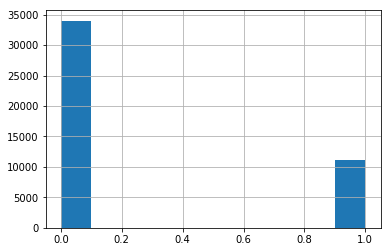

In [15]:
# Visualizamos la variable target
print(data.income.value_counts() / data.income.count())

data2['income'].hist()

Vemos que nos encontramos con un **desbalanceo de la variable target**  que tendremos que tener en cuenta.

age
workclass
education_level
education_num
marital_status
occupation
relationship
race
sex
capital_gain
capital_loss
hours_per_week
native_country


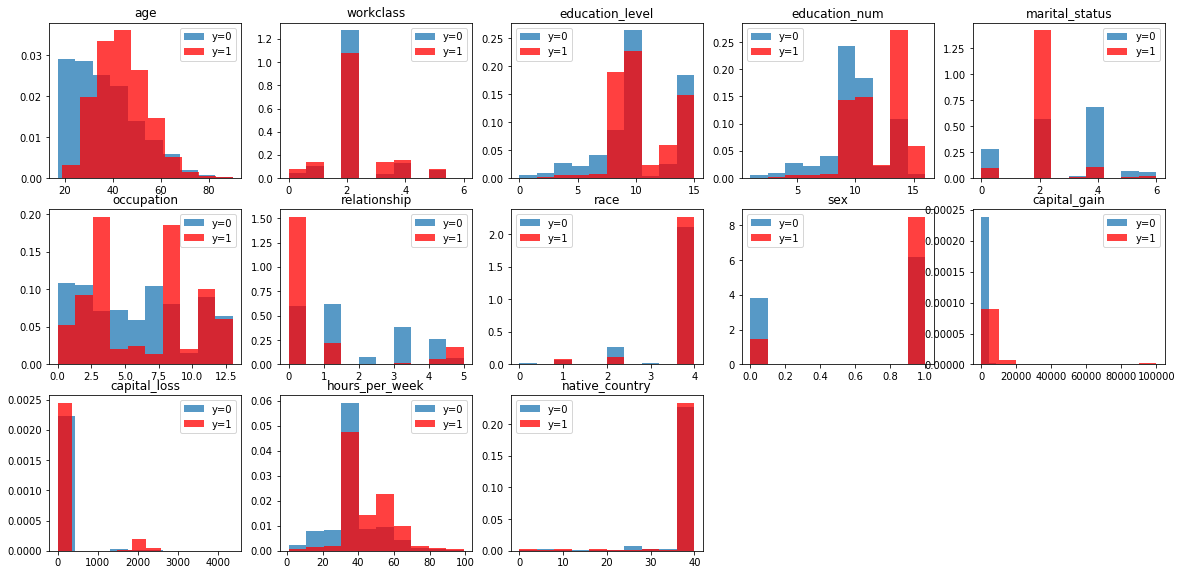

In [16]:
# Pintamos histogramas para cada clase
# Visualizamos las clases principales.

plt.figure(figsize=(20,20))

idx_0 =  data2['income'] == 0
idx_1 =  data2['income'] == 1

for i,feature in enumerate(data.columns.drop(['income'])): #dataset sin normalizar
    print(feature)
    plt.subplot(6,5,i+1)   
    plt.hist(data2.ix[idx_0,feature],normed=1, alpha=0.75,label='y=0')
    plt.hist(data2.ix[idx_1,feature],normed=1, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

El análisis de frecuencias de las variables nos confirma lo que ya vimos con las estadísticas simples.

- Age: La variable edad parece normalmente distribuida con outlier en el extremo derecho.
- Workclass: Aparece completamente descompensado hacia el tipo 2.
- Education level y Education num: En ambas tenemos 3 que concentran la mayoría de las observaciones de la variable.
- Marital Status: La población se reduce basicamente a 3 valores: 'Divorced', ' Married-civ-spouse',' Never-married'.
- Occupation: Es interesante ver que esta variable no presenta una opción prioritaria, sino que los valores se encuentran uniformemente distribuidos.
- RelationShip: Vemos que la opción de ' Husband' es la mayoritaria. Esto contrasta con ' Wife' que es una de las que menos. Los valores de esta variable parecen que está influida con el desbalanceo que apreciamos en la variable 'sex', en donde predominan los hombres en una proporción 2:1. En el análisis de correlación comprobaremos hasta que punto se encuentran influidas.
- Capital-gain y Capital-loss: En ambos casos parecen influyenciados por los outliers. Realizaremos una observación más precisa de estas dos variables.
- Hours per week: Normalmente distribuida con una influencia muy importante por las 40 h.
- Native-country: Esta variable, como ya vimos con las estadísticas estándar, no nos aporta información relevante.

A priori, no hay ninguna variable con poder de separación entre las muestras. **Age** es una candidata, pero vamos a aplicarle una transformación logarítmica.

(Previamente se ha probado aplicando una transformación sqrt() a ésta y a las variables 'education_level', 'education_num', 'occupation' y 'hours_per_week', viendo que la aplicación no mejoraba la normalidad de estas variables.

In [17]:
features_to_transform = ['age']

for feature in features_to_transform:
    data[feature] = data2[feature].apply(lambda x: np.log10(x)) # Transformación logaritmica

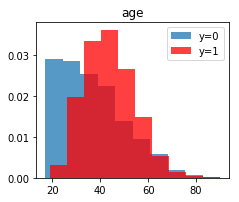

In [18]:
# Pintamos de nuevo los histogramas para cada clase
plt.figure(figsize=(20,20))

idx_0 =  data2['income'] == 0
idx_1 =  data2['income'] == 1

plt.subplot(6,5,1)
plt.hist(data2.ix[idx_0,'age'],normed=1, alpha=0.75,label='y=0')
plt.hist(data2.ix[idx_1,'age'],normed=1, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.title('age')

plt.show()

Aplicando la transformación logarítmica a la variable no se ha conseguido mejorar la separación entre clases.

<u>Como ejemplo educativo se ha decidido dejar el desarrollo.</u>

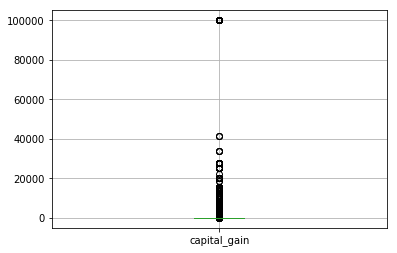

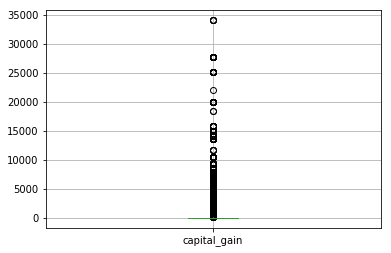

In [19]:
# Eliminamos los valores extremos de capital-gain
data.boxplot(column = 'capital_gain')
plt.show()

filtro = data['capital_gain'] <= 40000
data = data[filtro]

data.boxplot(column = 'capital_gain')
plt.show()

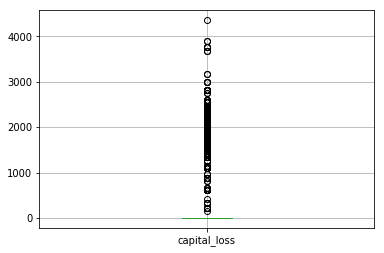

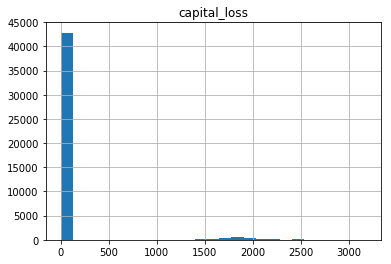

In [20]:
# Eliminamos los valores extremos de capital-loss
data.boxplot(column = 'capital_loss')
plt.show()

filtro = data['capital_loss'] <= 3500
data = data[filtro]

data.hist(column = 'capital_loss', bins=25)
plt.show()

Antes de continuar con el análisis exploratorio, vamos a eliminar la variable 'race' que ya sabemos que no tiene repercusión en la salida.

In [ ]:
data2 = data2.drop('race', axis=1)

## Análisis de Correlación

A continuación miraremos la correlación existente entre las variables predictivas.

In [21]:
columns=data.columns
data2[columns].corr()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.085892,-0.077084,0.037623,-0.271623,-0.004474,-0.247564,0.023776,0.082053,0.079683,0.059351,0.101992,-0.003180,0.237040
workclass,0.085892,1.000000,0.006677,0.040779,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.034543,0.008233,0.051366,0.003889,0.015659
education_level,-0.077084,0.006677,1.000000,0.374428,-0.027439,-0.032458,0.031155,0.008202,-0.057014,0.008668,0.004333,0.012674,0.116192,0.050004
education_num,0.037623,0.040779,0.374428,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.126907,0.081711,0.146206,0.092994,0.332800
marital_status,-0.271623,-0.033221,-0.027439,-0.064986,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.042399,-0.034820,-0.183178,-0.022721,-0.192711
occupation,-0.004474,0.017508,-0.032458,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056625,0.019435,0.015267,0.016160,-0.002848,0.049787
relationship,-0.247564,-0.065049,0.031155,-0.088431,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.056818,-0.058425,-0.259194,-0.007144,-0.253402
race,0.023776,0.049765,0.008202,0.031655,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.014078,0.020955,0.044738,0.124342,0.070844
sex,0.082053,0.069638,-0.057014,0.003417,-0.120008,0.056625,-0.582974,0.088935,1.000000,0.047444,0.046457,0.231425,-0.004170,0.215760
capital_gain,0.079683,0.034543,0.008668,0.126907,-0.042399,0.019435,-0.056818,0.014078,0.047444,1.000000,-0.032102,0.083880,0.007643,0.221034


Variables ligeramente correlacionadas son: 
    - education-level y education-num. A nivel de estudios más altos, más años empleados.
    - marital-status y age.
    - sex y relation-ship.
    - hours-per-week y relation-ship.

La variable objetivo **"income"**, está influenciada por **"age", "education-num", "relation-ship", "sex" y "capital-gain"**.

No se aprecia correlación fuerte entre ninguna de las variables predictoras. Es por ellos que vamos a aplicar un algoritmo de step que comprobará la influencia de las variables en la salida.

In [22]:
# convertimos el DataFrame al formato necesario para scikit-learn

features = data2.columns.drop(['income'])
X = data2[features].as_matrix()
y = data2['income'].as_matrix()


# Etapa de Aprendizaje. Búsqueda de las variables predictoras

## Separación de datos en Entrenamiento y Test.

Hemos visto durante la observación de la variables target, que había un balanceo hacia uno de los valores. 

Es por ello que vamos a utilizar **la estratificación** con respecto la variable a predecir, para de esta manera 
mantener la misma proporción existente de ambos valores, __tanto en TRAIN como en TEST__.

Escogemos un 20 % para Test y aplicamos el shuffle para barajar los datos 

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify = y, random_state = 0)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (36177, 93)
Datos test:  (9045, 93)


## Búsqueda de las variables importantes con Árbol de Decisión

best mean cross-validation score: 0.853
best parameters: {'max_depth': 9}


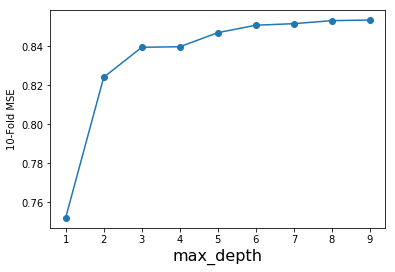

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [25]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Acc Train: ",treeModel.score(X_train,y_train))
print("Acc Test: ",treeModel.score(X_test,y_test))


Acc Train:  0.8631450921856428
Acc Test:  0.8558319513543394


Con un sólo árbol, **se ha obtenido un score bastante bueno** que nos va a servir de base para comparar los diferentes modelos.  

Vamos a ver el ranking de variables que ha establecido el árbol de decisión.

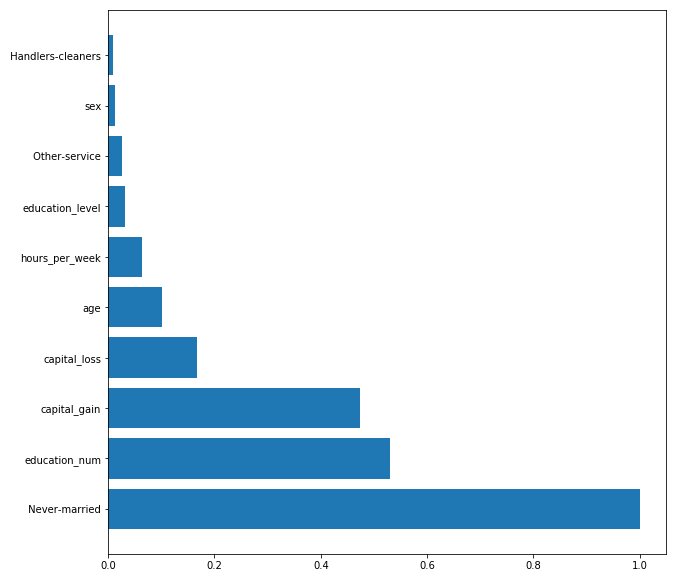

In [27]:
importances = treeModel.feature_importances_  # Características importantes
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]
max_value= 10
indices = indices[0:max_value]

plt.figure(figsize=(10,10))
#plt.barh(range(X_train.shape[1]),importances[indices])
plt.barh(range(max_value),importances[indices])
#plt.yticks(range(X_train.shape[1]),features[indices])
plt.yticks(range(max_value),features[indices])
plt.show()

# Antes de cortar la variables vamos a ver como impacta en el modelo la eliminación de las variables
# Para ello vamos a hacer validación cruzada con el ranking encontrado.

Es curioso que la variable age no se encuentre entre las primeras.

Vamos a evaluar el comportamiento del subset encontrado.

In [28]:
data_tree = data.drop(['native_country', 'education_level','marital_status', 'sex'], axis=1)
print('Pasamos a un subset de ', data_tree.shape[1]-1,' variables predictoras.')
data_tree.columns

Pasamos a un subset de  9  variables predictoras.


Index(['age', 'workclass', 'education_num', 'occupation', 'relationship',
       'race', 'capital_gain', 'capital_loss', 'hours_per_week', 'income'],
      dtype='object')

Volvemos a evaluar el comportamiento con las variables con mayor influencia en la variable target.

best mean cross-validation score: 0.853
best parameters: {'max_depth': 9}


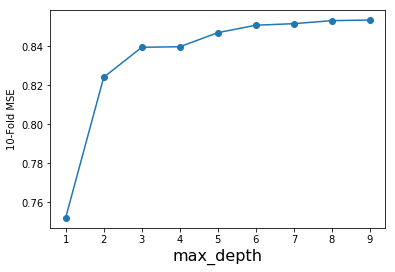

In [29]:
# Buscamos el parámetro libre
maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [30]:
# Miramos el resultado del modelo en test
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Acc Train: ",treeModel.score(X_train,y_train))
print("Acc Test: ",treeModel.score(X_test,y_test))

Acc Train:  0.8631450921856428
Acc Test:  0.8558319513543394


Vemos que la eliminación de las variables no ha afectado al resultado, por lo que la selección de variables es buena y los resultados obtenidor mediante el árbol de decisión, **nos sirve de base para comparar con otros modelos**. 

### Elección de las variables predictoras mediante StepWise y árbol de decisión

Vamos a utilizar una selección de variables hacia adelante (**StepWise**) junto con un algoritmo de árbol de decisión para encontrar las variables más influyentes. Para intentar paliar el problema que tiene el stepwise que no contempla la influencia entre variables, se incluye un paso que randomiza el vector que contiene el nombre de las variables con cada paso.

In [47]:
import random
#Columns=X.columns

index_test= 0
best_score_test= 0
best_score_train = 0
Best_variable =[]
for n in range(1,6):
    variable_list=[]
    #Columns = random.sample(list(data2.columns), len(data2.columns))
    # Limited the number of columns. In order to improve its performance, it's possible to increase it
    Columns = random.sample(list(data2.columns), 20)
    num_iter=1 
    print('Pasada Num: ', n)
    for i in Columns:
        
        variable_list.append(i)
        #print(variable_list)

        X_step_train, X_step_test, y_step_train, y_step_test = train_test_split(data2[variable_list], y, test_size=.25, random_state = 2)

        # Buscamos el parámetro libre
        maxDepth = range(1,10)
        param_grid = {'max_depth': maxDepth }
        grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
        grid.fit(X_step_train, y_step_train)

        maxDepthOptimo = grid.best_params_['max_depth']
        treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)
        
        score_test= treeModel.score(X_test,y_test).round(4)
        score_train = treeModel.score(X_train,y_train).round(4)
        # Descomentar para verbose. Si me da tiempo lo meto como opción en el algoritmo !!!!.
        #print("Num: %i -> Train: %f; Test: %f " %(num_iter, score_train, score_test)) #Verbose 1
        #print("Columns: %s -> Train: %f; Test: %f " %(variable_list, score_train, score_test)) #Verbose 2
        num_iter +=1        
        if score_test> best_score_test:
            best_score_test = score_test
            best_score_train = score_train
            Best_variable = variable_list
    print('Best score: train: %f, test: %f' %(best_score_train, best_score_test))

print("Results:")
print("Best Train score: ", score_train)
print("Best Test score: ", score_test)
print("Best variable list: ", Best_variable)

Pasada Num:  1
Best score: train: 0.752200, test: 0.752100
Pasada Num:  2
Best score: train: 0.863200, test: 0.855900
Pasada Num:  3
Best score: train: 0.863200, test: 0.855900
Pasada Num:  4
Best score: train: 0.863200, test: 0.855900
Pasada Num:  5
Best score: train: 0.863200, test: 0.855900
Results:
Best Train score:  0.8599
Best Test score:  0.8552
Best variable list:  [' Outlying-US(Guam-USVI-etc)', ' Yugoslavia', 'capital_loss', ' United-States', ' Jamaica', ' Divorced', ' Cuba', 'education_level', ' Thailand', ' Laos', 'education_num', ' Not-in-family', ' Self-emp-not-inc', ' India', ' Ecuador', 'relationship', ' Honduras', ' Local-gov', ' England', ' Other-service']


Si comparamos con las variables encontradas con un único árbol de decisión, vemos que no ha habido variación. 
Un árbol de decisión nos permite con relativa facilidad el descubrir las características más fuertes del dataset. Por contra, <u>es un algoritmo que no es muy robusto </u>. Por ello, tiene que ser complementado con otros algoritmos y su resultado comprobado.

### Variables predictoras

En este apartado vamos a reunir las variables predictoras encontradas con las diferentes técnicas:
    
- **árbol de decisión** : workclass, age, capital_gain, capital_loss, education_num, occupation, relationship, hours_per_week
- **StepWise** : workclass, relationship, capital_loss, capital_gain, education_num, age, hours_per_week, occupation.


Con este conjunto, escogemos como variables predictoras las siguientes: 
    - workclass, capital_gain, capital_loss, age, relationship, education_num, occupation

Para poder ver la capacidad de clasificación de los diferentes modelos, utilizamos el conjunto de variables predictoras seleccionadas anteriormente.

In [49]:
BestVariable = ['workclass', 'capital_gain', 'capital_loss', 'age', 'relationship', 'education_num', 'occupation']
BestX = data2[BestVariable]
BestX.head()

,workclass,capital_gain,capital_loss,age,relationship,education_num,occupation
0,5,2174.0,0.0,39,1,13.0,0
1,4,0.0,0.0,50,0,13.0,3
2,2,0.0,0.0,38,1,9.0,5
3,2,0.0,0.0,53,0,7.0,5
4,2,0.0,0.0,28,5,13.0,9


## Separación de datos en Entrenamiento y Test.

In [60]:
# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X=data2.drop('income', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(BestX, y, test_size=.2, shuffle=True, stratify = y, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify = y, random_state = 0)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (36177, 93)
Datos test:  (9045, 93)


# Prueba de modelos de Clasificación

## Clasificación mediante un modelo de regresión logística

Primeramente vamos a considera empezando por un modelo sencillo como es la regresión logística.   
Este modelo nos servirá como base para poder comparar.

best mean cross-validation score: 0.847
best parameters: {'C': 23.357214690901213}
test-set score: 0.85


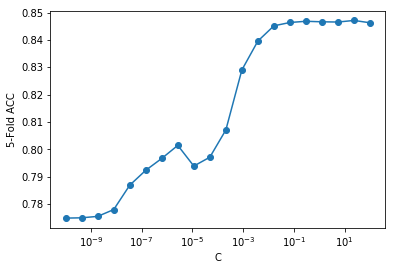

In [61]:
from sklearn.linear_model import LogisticRegression

vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()


En el eje y tenemos el valor de Accuracy. A mayor valor, mejor comportamiento del modelo entrenado. 
Por contra, conforme el valor de C se incrementa, aumenta la exactitud hasta llegar a un punto que se mantiene estable.

In [62]:
BestC = grid.best_params_['C']
lr_model = LogisticRegression(fit_intercept=False, C=BestC).fit(X_train,y_train)

print("R2 Train: ", lr_model.score(X_train,y_train))
print("R2 Test: ", lr_model.score(X_test,y_test))

R2 Train:  0.8484119744589104
R2 Test:  0.8504145936981757


In [63]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [64]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()
    
    acc = (tp+tn)/(tn + tp+ fp+ fn)
    sen = tp/ (tp+fn)
    esp = tn/ (tn+fp)
    ppv = tp/ (tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))
    
    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5), [acc, sen, esp, ppv, fsc])
    plt.xticks(range(5), ['ACC', 'SEN', 'ESP', 'PPV', 'FSC'])
    plt.plot([-1, 6], [1,1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5, 4.5))
    plt.ylim((0,1.1))
    plt.title('Métricas')
    plt.show()

Independientemente de la métrica obtenida, cerca del 80 % y que nos servirá de referencia, vamos a ver que tal predice generando la matriz de confusión.

Train score:


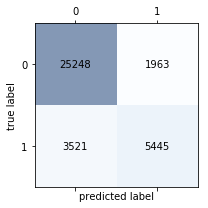

ACC:  0.8484119744589104
SEN:  0.6072942226187821
ESP:  0.9278600565947595
PPV:  0.7350161987041036
FSC:  0.6650787834371563


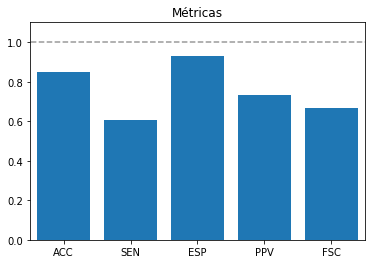

Test score:


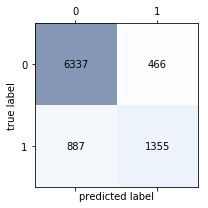

ACC:  0.8504145936981757
SEN:  0.6043710972346119
ESP:  0.9315008084668529
PPV:  0.7440966501922021
FSC:  0.6669948314053654


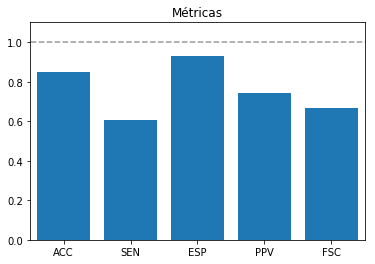

In [66]:
from sklearn.metrics import confusion_matrix

print("Train score:")
print("===========")
y_pred = lr_model.predict(X_train)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

print("Test score:")
print("===========")
y_pred = lr_model.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

Vemos que el modelo con regresión logística tiene una sensibilidad muy baja. Efectivamente, vemos que el número de personas que ganan más de 50k y que el modelo predice como que están por debajo de ese importe, es muy alto.

Por último, vamos a visualizar la curva ROC.

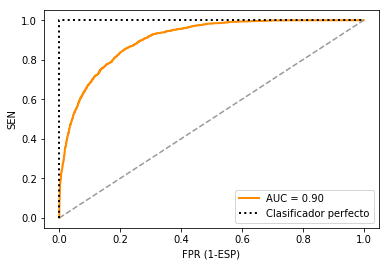

In [67]:
from sklearn.metrics import roc_curve, auc

y_prob = lr_model.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Como la variable target se encuentra desbalanceada, vamos a introducir el parámetro **class_weight** para ajustar los pesos  y comparamos con el resultado anterior.

También utilizaremos **F1-score** como medida de control, que mantendrá un equilibrio entre la sensibilidad y la exactitud.

best mean cross-validation score: 0.680
best parameters: {'C': 23.357214690901213}
test-set score: 0.68


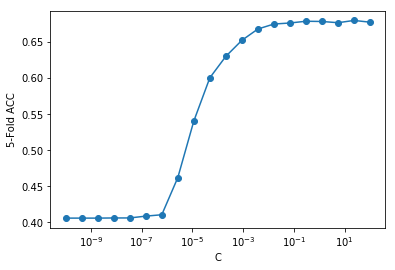

In [68]:
vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False, class_weight='balanced'), 
                    scoring= 'f1', 
                    param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

In [69]:
BestC = grid.best_params_['C']
lr_model_balanced = LogisticRegression(fit_intercept=False, class_weight='balanced', C=BestC).fit(X_train,y_train)

print("R2 Train: ", lr_model.score(X_train,y_train))
print("R2 Test: ", lr_model.score(X_test,y_test))

R2 Train:  0.8484119744589104
R2 Test:  0.8504145936981757


Train score:


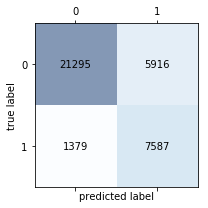

ACC:  0.7983525444343091
SEN:  0.8461967432522864
ESP:  0.782587924001323
PPV:  0.5618751388580315
FSC:  0.6753304552939606


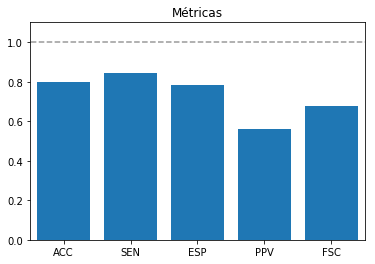

Test score:


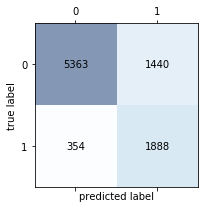

ACC:  0.8016583747927032
SEN:  0.8421052631578947
ESP:  0.7883286785241805
PPV:  0.5673076923076923
FSC:  0.6779174147217235


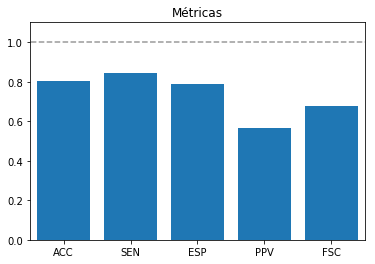

In [71]:
print("Train score:")
print("===========")
y_pred = lr_model_balanced.predict(X_train)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

print("Test score:")
print("===========")
y_pred = lr_model_balanced.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)


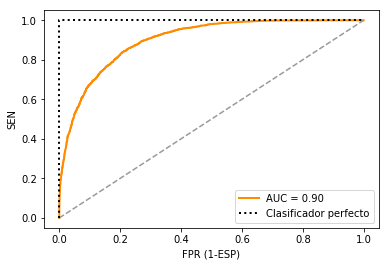

In [72]:
y_prob = lr_model_balanced.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Hemos aumentado ligeramente nuestro AUC utilizando el balanceo y F1-score. A cambio, como era de preveer, se ha reducido nuestra exactitud.

## Clasificación mediante un modelo de árbol de decisión

best mean cross-validation score: 0.662
best parameters: {'max_depth': 8}


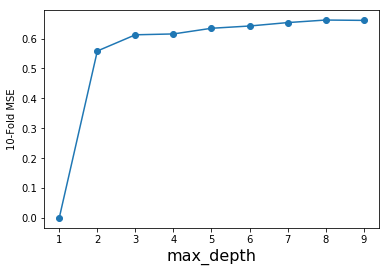

In [73]:
# Buscamos el parámetro libre
maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
# Con scoring F1.
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), scoring='f1', param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [74]:
# Miramos el resultado del modelo en test
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.85988335130055
Test:  0.8551686014372581


Train score:


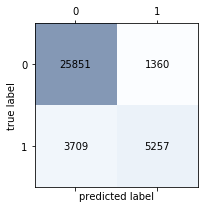

ACC:  0.85988335130055
SEN:  0.5863261209011822
ESP:  0.9500202124140973
PPV:  0.7944687925041559
FSC:  0.6747096194571006


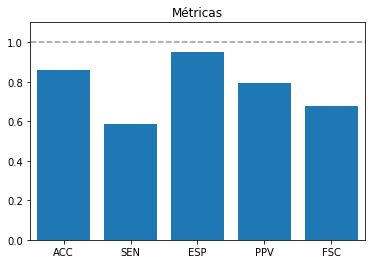

Test score:


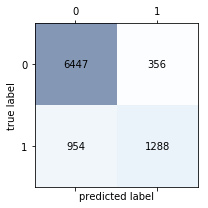

ACC:  0.8551686014372581
SEN:  0.5744870651204282
ESP:  0.9476701455240335
PPV:  0.7834549878345499
FSC:  0.662892434379825


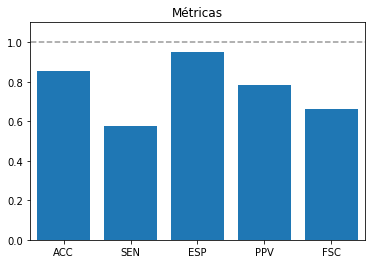

In [76]:
print("Train score:")
print("===========")
y_pred = treeModel.predict(X_train)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

print("Test score:")
print("===========")
y_pred = treeModel.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)


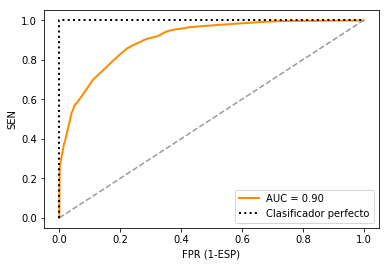

In [77]:
y_prob = treeModel.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Con nuestro modelo de clasificación mediante árbol de decisión, **hemos ganado en sensibilidad**, aumentando el área bajo la curva ROC al 90%.

## Clasificación mediante Knn

In [78]:
from sklearn.neighbors import KNeighborsClassifier
N_neighbors=np.arange(1,10)
param_grid = {'n_neighbors': N_neighbors}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.847
best parameters: {'n_neighbors': 8}


In [79]:
Best_Neighbor = grid.best_params_['n_neighbors']

Knn= KNeighborsClassifier(n_neighbors=Best_Neighbor)
Knn.fit(X_train,y_train)

print("R2 Train: ", Knn.score(X_train,y_train))
print("R2 Test: ", Knn.score(X_test,y_test))

R2 Train:  0.8778505680404677
R2 Test:  0.8485351022664456


Train score:


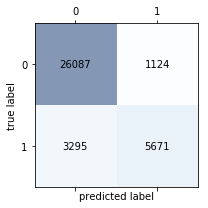

ACC:  0.8778505680404677
SEN:  0.6325005576622797
ESP:  0.9586931755540039
PPV:  0.8345842531272994
FSC:  0.7196243893153986


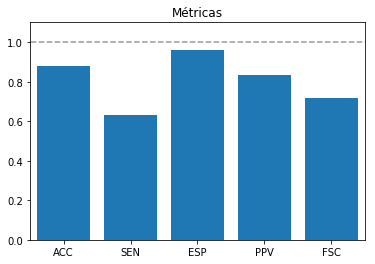

Test score:


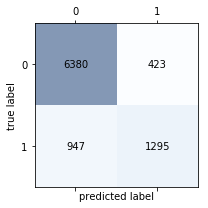

ACC:  0.8485351022664456
SEN:  0.5776092774308653
ESP:  0.937821549316478
PPV:  0.7537834691501746
FSC:  0.6540404040404041


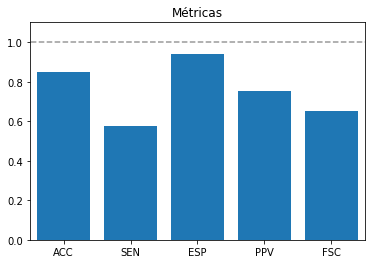

In [80]:
print("Train score:")
print("===========")
y_pred = Knn.predict(X_train)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

print("Test score:")
print("===========")
y_pred = Knn.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)


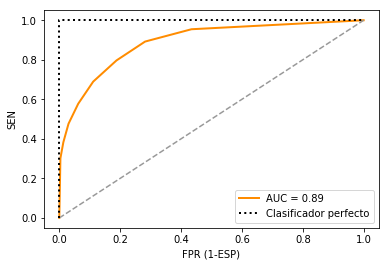

In [81]:
y_prob = Knn.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Con el modelo de vecinos más cercanos, seguimos aumentado la sensibilidad del modelo. El AUC se mantiene cerca del 0.90.

## Clasificación mediante RandomForest

Primeramente vamos a encontrar el parámetro de profundidad del árbol del randomForest mediante validación cruzada, fijando el número de árboles del bosque.   
Para ello vamos a generar 4 casos, con 50, 100, 200 y 500, controlando la salida.    
Nos interesa ver que los errores se mantienen estables conforme aumentamos el número de árboles.

best mean cross-validation score: 0.860
best parameters: {'max_depth': 14}


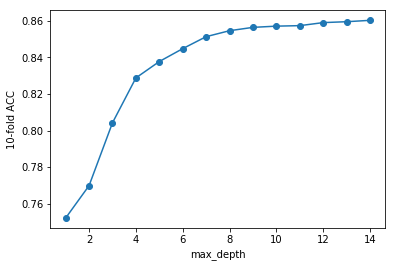

In [82]:
# Encontramos los parámetros libres del RandomForest
# Optimizar para el número de cores. n_jobs
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=500, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [83]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=100,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8786245404538795
Test:  0.8606965174129353


**Random forest Results:**
- n_Estimators: 50, depth: 13, Train: 0.8794, Test: 0.8646
- n_Estimators: 100, depth: 13, Train: 0.8795, Test: 0.8656
- n_Estimators: 200, depth: 14, Train: 0.8853, Test:  0.8673
- n_Estimators: 500, depth: 14, Train: 0.8840, Test:  0.8664

Podemos observar como el error se mantiene estable conforme aumentamos la complejidad del modelo con las variables seleccionadas. 

El mejor valor lo obtenemos con un bosque compuesto por 100 árboles, ya que aunque con 200 tenemos mejor métrica, la diferencia entre entrenamiento y test también aumenta. Entre 100 y 200, por Occam, mejor 100.

Como observación, la mejoría encontrada con random forest  y el árbol de decisión, con un 0.8540, es despreciable.

Train score:


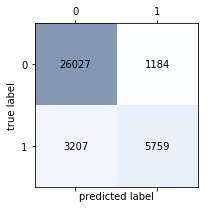

ACC:  0.8786245404538795
SEN:  0.6423154137854116
ESP:  0.956488184925214
PPV:  0.8294685294541264
FSC:  0.7239927085297632


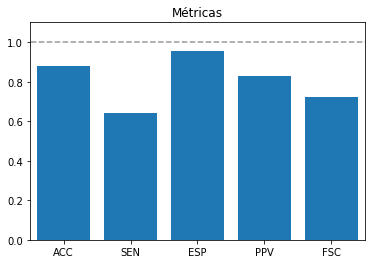

Test score:


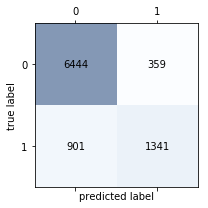

ACC:  0.8606965174129353
SEN:  0.5981266726137378
ESP:  0.9472291636042922
PPV:  0.7888235294117647
FSC:  0.680365296803653


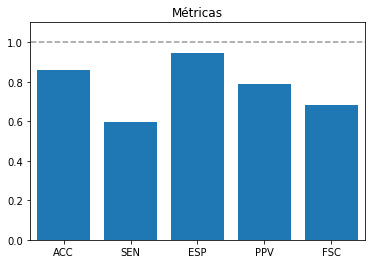

In [84]:
print("Train score:")
print("===========")
y_pred = bagModel.predict(X_train)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

print("Test score:")
print("===========")
y_pred = bagModel.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

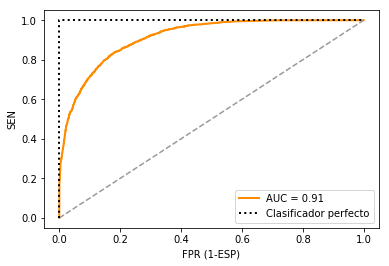

In [85]:
y_prob = bagModel.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Se ha aumentado la sensibilidad a 0.64 y el AUC a 0.92 con una exactitud del 0.88

## Clasificación mediante Boosted Trees

In [86]:
from sklearn.ensemble import GradientBoostingClassifier 

Niterations = [25,50,75,100,125,150]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.870
best parameters: {'learning_rate': 0.5, 'n_estimators': 125}


Booted Tree Values: Learning rate: 0.5; n_estimators: 100; max_depth=3; Score: 0.867

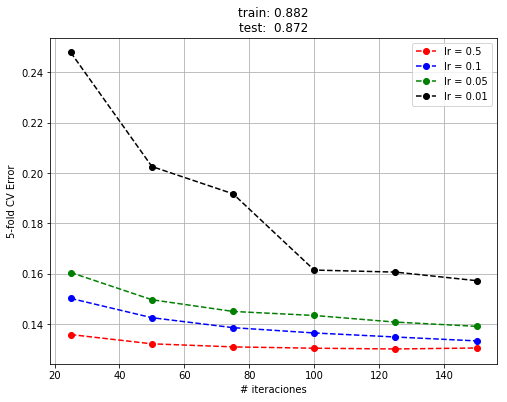

In [87]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate= 0.5, n_estimators= 125)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
plt.figure(figsize=(8,6))
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

El parámetro de learning rate escogido es el que tiene el error más bajo. 
No obstante, el de 0.1 parece que tiene un mejor comportamiento. 
Miraremos si aumentando el número de árboles sobre este learning rate conseguimos mejorar el score.

In [88]:
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 500)
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

Train:  0.8794537966111065
Test:  0.872636815920398


Vemos que se ha mejorado el scoring aumentando el número de iteraciones a 500. 

Calcularemos su matriz de confusión y Curva ROC bajo estos parámetros.

Train score:


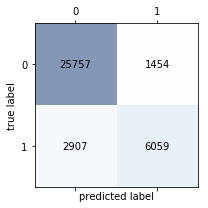

ACC:  0.8794537966111065
SEN:  0.6757751505688155
ESP:  0.9465657270956599
PPV:  0.8064687874351125
FSC:  0.7353601553492324


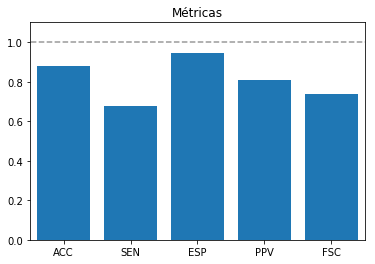

Test score:


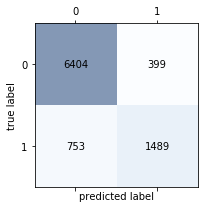

ACC:  0.872636815920398
SEN:  0.6641391614629795
ESP:  0.9413494046744083
PPV:  0.7886652542372882
FSC:  0.7210653753026635


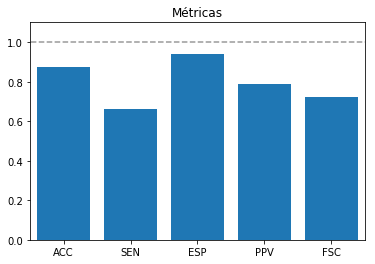

In [89]:
print("Train score:")
print("===========")
y_pred = bt.predict(X_train)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

print("Test score:")
print("===========")
y_pred = bt.predict(X_test)
confmat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

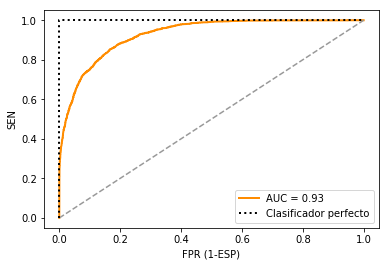

In [90]:
y_prob = bt.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

La curva ROC evidencia la robustez del algoritmo de Boosted Tree.

# Conclusiones

A continuación se expone una tabla con las métricas por modelo encontradas.  
Recordar que nos encontramos ante una muestra que contine la variable target desbalanceada, cosa que nos ha obligado a ajustar el modelo.


| Modelo | Acc | Sen | Esp | PPV | FSC | AUC |
| ------ | --- | --- | --- | --- | --- | --- |
| Regresión logística | 0.85 | 0.60 | 0.93 | 0.74 | 0.67 | 0.90 |
| Regresión logísticca balanceada | 0.80 | 0.84 | 0.79 | 0.57 | 0.68 | 0.90 |
| Árbol de decisión | 0.86 | 0.57 | 0.94 | 0.78 | 0.66 | 0.90 |
| Vecinos más cercanos (Knn) | 0.85 | 0.58 | 0.94 | 0.75 | 0.65 |0.89 |
| Random Forest | 0.86 | 0.60 | 0.94 | 0.79 |0.68 | 0.91 |
| Boosted Tree | 0.87 | 0.66 |0.94 | 0.79 | 0.72 | 0.93 |

Si recapitulamos, las pruebas entre los diferentes algoritmos se ha efectuado con una selección de las variables predictoras encontradas mediante un concenso entre diferentes métodos:

<div class = "alert alert-info">
'relationship', 'workclass', 'capital_loss', 'education_num', 'age', 'hours_per_week', 'capital_gain', 'occupation'
</div>

A la vista de los datos obtenidos, y mirando los resultados del F1-score, que nos indica la relación entre la sensibilidad y la precisión, junto con el área bajo la curva ROC, nos inclinamos por un modelo de **Boosted Tree, que nos ofrece una mayor robustez**. 